In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Data COVID-19 Jawa Barat.xlsx')
data.head(3)

,tanggal,kode_prov,nama_prov,kode_kab,nama_kab,closecontact_total,closecontact_discarded,closecontact_dikarantina,suspect_total,suspect_discarded,...,pertumbuhan_suspect_total,pertumbuhan_suspect_discarded,pertumbuhan_suspect_diisolasi,pertumbuhan_probable_total,pertumbuhan_probable_discarded,pertumbuhan_probable_diisolasi,pertumbuhan_probable_meninggal,pertumbuhan_confirmation_total,pertumbuhan_confirmation_selesai,pertumbuhan_confirmation_meninggal
0,2020-08-01,32,Provinsi Jawa Barat,3203,KAB. CIANJUR,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-08-01,32,Provinsi Jawa Barat,3211,KAB. SUMEDANG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-08-01,32,Provinsi Jawa Barat,3210,KAB. MAJALENGKA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
loc = pd.read_csv('list_location_id.csv').rename(columns={'kabko':'regency'})
loc.head(3)
# source https://datahub.io/JemputData/location_id

,regency,lat,long
0,KAB. ACEH BARAT,4.4543,96.1527
1,KAB. ACEH BARAT DAYA,3.7963,97.0068
2,KAB. ACEH BESAR,5.4529,95.4778


In [4]:
columns = ['tanggal','nama_kab',
           'confirmation_total',
           'confirmation_selesai',
           'confirmation_meninggal',
           'pertumbuhan_confirmation_total',
           'pertumbuhan_confirmation_selesai', 
           'pertumbuhan_confirmation_meninggal']

In [5]:
data = data[columns]
data.rename(columns={'tanggal':'date',
                     'nama_kab':'regency',
                     'confirmation_total':'confirmation',
                     'confirmation_selesai':'recovered',
                     'confirmation_meninggal':'deaths',
                     'pertumbuhan_confirmation_total':'daily_confirmation',
                     'pertumbuhan_confirmation_selesai':'daily_recovered', 
                     'pertumbuhan_confirmation_meninggal':'daily_deaths'}, inplace=True)

In [6]:
data['date'] = pd.to_datetime(data['date'])

data = data[data['regency']!='BELUM TERIDENTIFIKASI']

In [7]:
the_last_total_cases_data = data[data['date']=='2021-03-18']

In [8]:
geo_data_west_java = pd.merge(the_last_total_cases_data, loc, how='left', left_on='regency', right_on='regency')

In [9]:
confirmation_cases = the_last_total_cases_data.sort_values('confirmation')
recovered_cases = the_last_total_cases_data.sort_values('recovered')
deaths_cases = the_last_total_cases_data.sort_values('deaths')

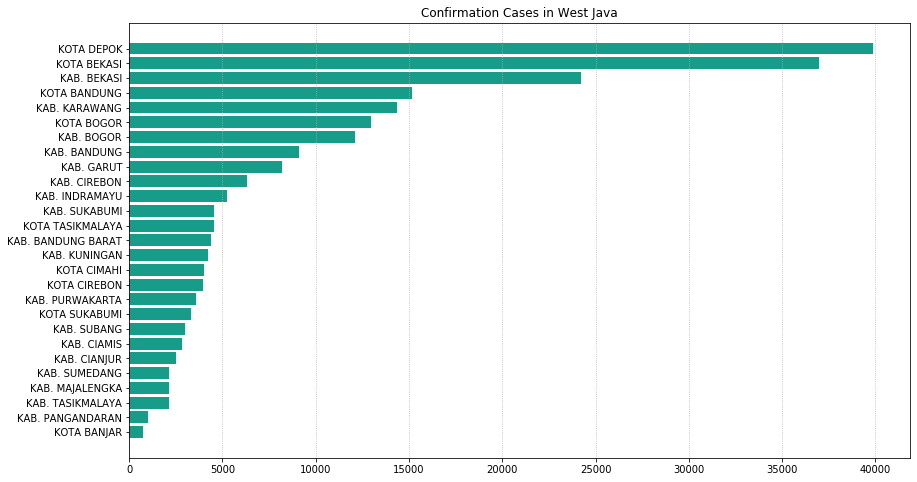

In [10]:
_, ax = plt.subplots(figsize=(14,8))
ax.set_title('Confirmation Cases in West Java')
ax.barh(confirmation_cases['regency'], confirmation_cases['confirmation'], color='#169c88')
plt.grid(True, axis='x', linestyle=':')
plt.show()

In [11]:
west_java_map = folium.Map(location=[-6.9, 107.6], zoom_start=8.5, tiles='OpenStreetMap')
for i in range(len(geo_data_west_java)):
    folium.Circle(
        location=[geo_data_west_java.iloc[i]['lat'], geo_data_west_java.iloc[i]['long']], 
        popup=geo_data_west_java.iloc[i]['regency'],
        radius=float(geo_data_west_java.loc[i,'confirmation']), 
        color='#169c88', 
        fill = True, 
        fill_color='#169c88'
    ).add_to(west_java_map)

In [12]:
west_java_map

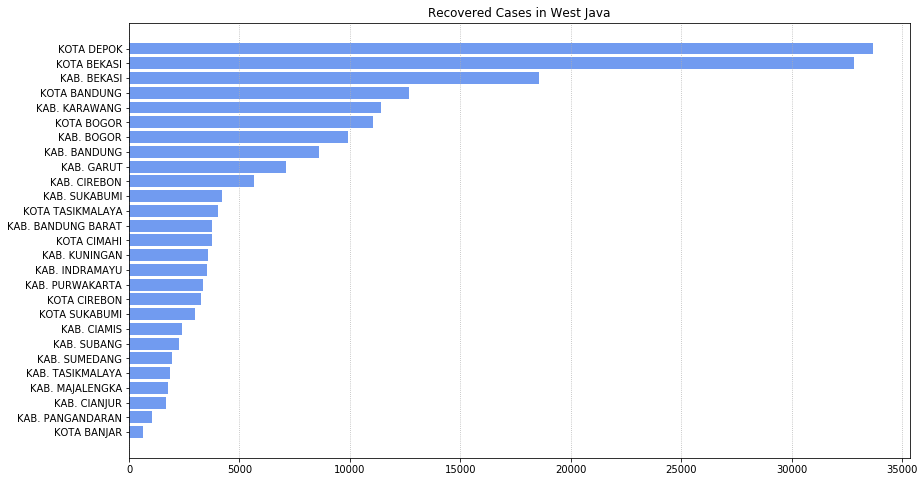

In [13]:
_, ax = plt.subplots(figsize=(14,8))
ax.set_title('Recovered Cases in West Java')
ax.barh(recovered_cases['regency'], recovered_cases['recovered'], color='#719bf0')
plt.grid(True, axis='x', linestyle=':')
plt.show()

In [14]:
west_java_map = folium.Map(location=[-6.9, 107.6], zoom_start=8.5, tiles='OpenStreetMap')


for i in range(len(geo_data_west_java)):
    folium.Circle(
        location=[geo_data_west_java.iloc[i]['lat'], geo_data_west_java.iloc[i]['long']], 
        popup=geo_data_west_java.iloc[i]['regency'],
        radius=float(geo_data_west_java.loc[i,'recovered']), 
        color='#719bf0', 
        fill = True, 
        fill_color='#719bf0'
    ).add_to(west_java_map)
    
    
west_java_map

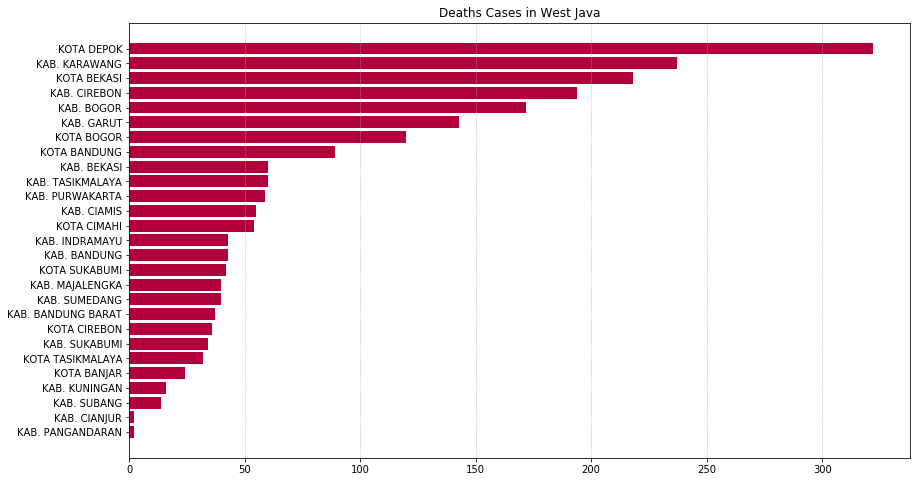

In [15]:
_, ax = plt.subplots(figsize=(14,8))
ax.set_title('Deaths Cases in West Java')
ax.barh(deaths_cases['regency'], deaths_cases['deaths'], color='#b2003f')
plt.grid(True, axis='x', linestyle=':')
plt.show()

In [16]:
west_java_map = folium.Map(location=[-6.9, 107.6], zoom_start=8.5, tiles='OpenStreetMap')


for i in range(len(geo_data_west_java)):
    folium.Circle(
        location=[geo_data_west_java.iloc[i]['lat'], geo_data_west_java.iloc[i]['long']], 
        popup=geo_data_west_java.iloc[i]['regency'],
        radius=float(geo_data_west_java.loc[i,'deaths'])*50, 
        color='#b2003f', 
        fill = True, 
        fill_color='#b2003f'
    ).add_to(west_java_map)
    
    
west_java_map

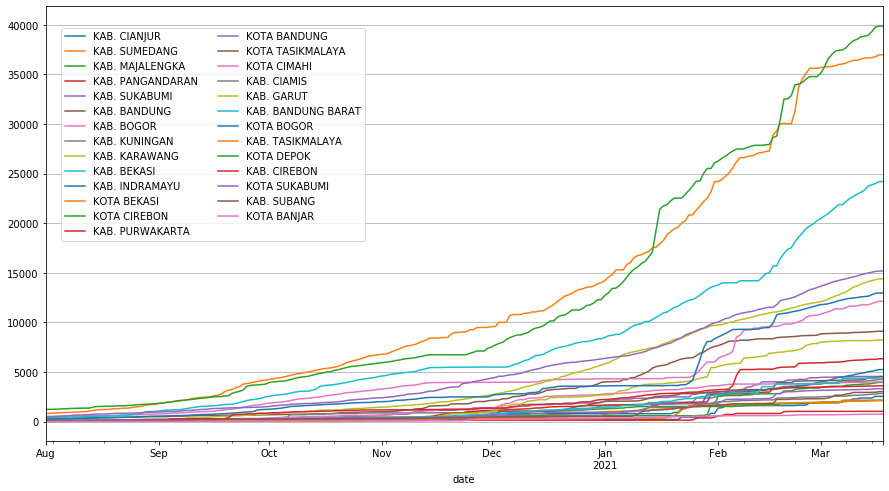

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
for regency in list(data['regency'].unique()):
    data[data['regency']==regency][['date','confirmation']].plot(x='date', y='confirmation', ax=ax, label=regency)
plt.legend(loc=8, ncol=2, bbox_to_anchor=(0.2,0.45))
plt.grid(True, axis='y')
plt.show()

In [18]:
top_regencies = ['KOTA DEPOK', 'KOTA BEKASI','KAB. BEKASI', 'KOTA BANDUNG', 'KAB. KARAWANG', 'KOTA BOGOR']

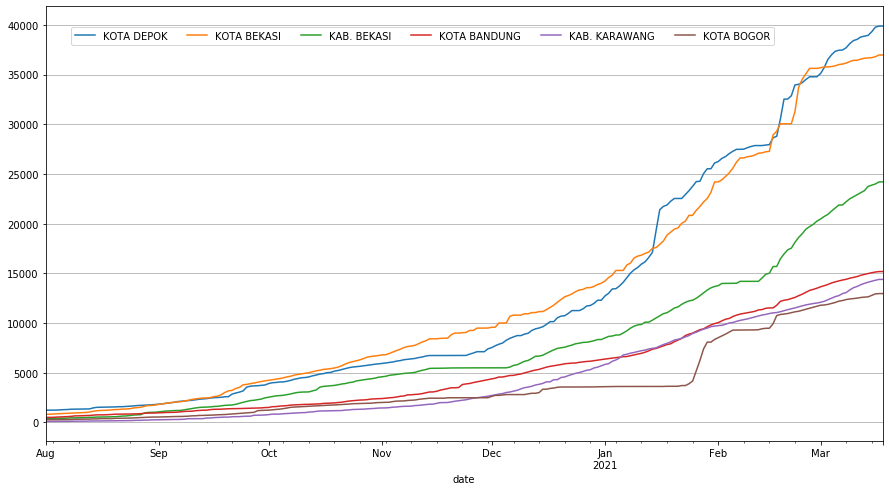

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
for regency in top_regencies:
    data[data['regency']==regency][['date','confirmation']].plot(x='date', y='confirmation', ax=ax, label=regency)
plt.legend(loc=8, ncol=6, bbox_to_anchor=(0.45, 0.9))
plt.grid(True, axis='y')
plt.show()

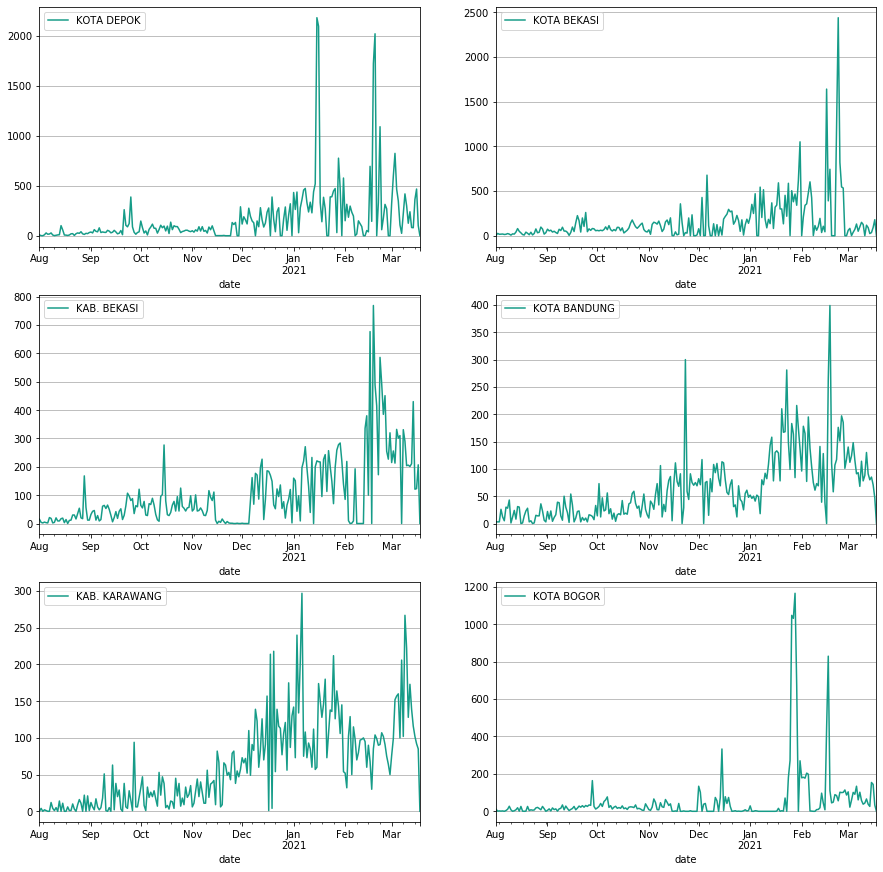

In [20]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
for idx in range(3):
    for col in range(2):
        data[data['regency']==top_regencies[2*idx+col]][['date','daily_confirmation']]\
            .plot(x='date', 
                  y='daily_confirmation', 
                  ax=ax[idx, col], 
                  label=top_regencies[2*idx+col], 
                  color='#169c88')
        ax[idx,col].grid(True, axis='y')
plt.show()

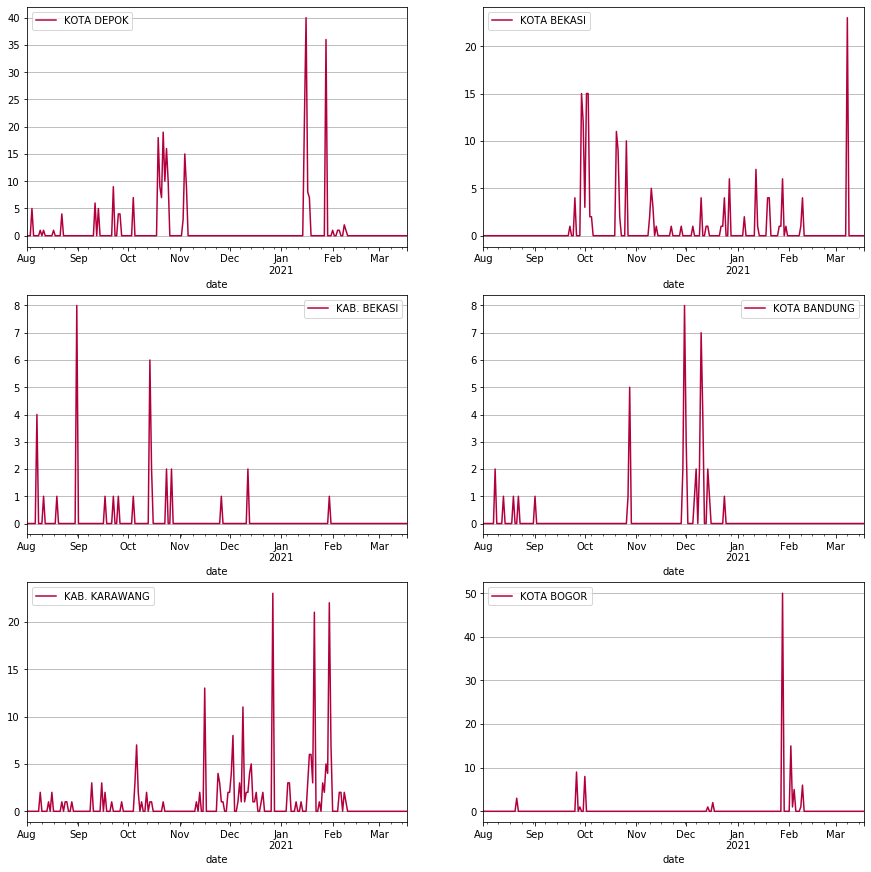

In [21]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
for idx in range(3):
    for col in range(2):
        data[data['regency']==top_regencies[2*idx+col]][['date','daily_deaths']]\
            .plot(x='date', 
                  y='daily_deaths', 
                  ax=ax[idx, col], 
                  label=top_regencies[2*idx+col], 
                  color='#b2003f')
        ax[idx,col].grid(True, axis='y')
plt.show()